### Les Embeddings de mots

J'ai entrainé des embeddings en français à partir des données du corpus OSCAR <span class="badge badge-secondary">(Suárez et al., 2019)</span> (886.47 M de phrases qui correspondent à 21.66 B de mots). La taille du vocabulaire est de 2.9 M de mots. Les embeddings sont entrainés avec l'algorithme Word2Vec <span class="badge badge-secondary">(Mikolov et al., 2013)</span>.

<span class="badge badge-secondary">(Suárez et al., 2019)</span> Suárez, Pedro Javier Ortiz, Benoît Sagot, and Laurent Romary. "Asynchronous pipeline for processing huge corpora on medium to low resource infrastructures." 7th Workshop on the Challenges in the Management of Large Corpora (CMLC-7). Leibniz-Institut für Deutsche Sprache, 2019.

<span class="badge badge-secondary">(Mikolov et al., 2013)</span> Tomas Mikolov, Kai Chen, Greg Corrado, Jeffrey Dean: Efficient Estimation of Word Representations in Vector Space. ICLR (Workshop Poster) 2013

<span class="badge badge-secondary">(Mikolov et al., 2013)</span> Tomas Mikolov, Ilya Sutskever, Kai Chen, Gregory S. Corrado, Jeffrey Dean: Distributed Representations of Words and Phrases and their Compositionality. NIPS 2013: 3111-3119


In [ ]:
# !pip install gensim==3.8.1 scikit-learn==0.23.2 matplotlib==3.3.2
# puis redémarer l'environnement d'éxécution

In [2]:
from collections import Counter
from gensim.models import Word2Vec
import numpy as np
from gensim.models import KeyedVectors


In [2]:
# !wget --no-check-certificate -r 'https://docs.google.com/uc?export=download&id=1qgd_9RDj_nOKeoCBHKAL_PvqT_d5E7OL' -O oscar.fr.300.model.zip
# !unzip oscar.fr.300.model.zip

In [3]:
w2v_model = Word2Vec.load("oscar.fr.300.model")
w2v_model.init_sims(replace=True)

In [172]:
len(w2v_model.wv.vocab)

2889260

In [4]:
w2v_model = KeyedVectors.load_word2vec_format("oscar.fr.300.10k.model")
w2v_model.init_sims(replace=True)

In [5]:
# On crée un array avec les 10,000 premiers mots et on crée le dictionaire de vocabulaire

word_count = {k: w2v_model.wv.vocab[k].count for k in w2v_model.wv.vocab}
word_count = Counter(word_count)
word_count.most_common(10)

idx2w = {i: w for (i, (w, f)) in enumerate(word_count.most_common(10000))}
w2idx = {w: i for (i, (w, f)) in enumerate(word_count.most_common(10000))}


embeddings_vectors = [w2v_model.wv[w] for (w, f) in word_count.most_common(10000)]
word2vec_embeddings = np.vstack(embeddings_vectors)

/Users/antoine/opt/anaconda3/envs/nlp-101/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/antoine/opt/anaconda3/envs/nlp-101/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  # This is added back by InteractiveShellApp.init_path()


In [6]:
print(word2vec_embeddings.shape)

(10000, 300)


In [7]:
w2v_model.wv['roi'].shape

/Users/antoine/opt/anaconda3/envs/nlp-101/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  """Entry point for launching an IPython kernel.


(300,)

In [8]:
w2v_model.wv['roi']

/Users/antoine/opt/anaconda3/envs/nlp-101/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  """Entry point for launching an IPython kernel.


array([-0.00974371, -0.07115725, -0.05304886, -0.06111938,  0.00711304,
        0.00352572,  0.03932348,  0.05074471, -0.07233174,  0.11877739,
        0.09426236,  0.03346704, -0.01496981,  0.06255298, -0.07193711,
       -0.04901791,  0.07090642, -0.03061282,  0.02684489,  0.01519295,
        0.03992129, -0.03081262,  0.02786066, -0.03540531, -0.03251525,
        0.09405202,  0.03987744,  0.07857798,  0.01740768,  0.00881206,
       -0.02475108,  0.04742174,  0.13456628,  0.0797467 , -0.04334282,
       -0.16672334, -0.10993602,  0.02642046, -0.01320829,  0.05970244,
        0.02105094,  0.00481087,  0.01685971,  0.06660962, -0.07916994,
        0.06213225, -0.05055647, -0.03887547, -0.07168845, -0.00571011,
        0.0217009 , -0.00549068, -0.09401304, -0.01426544, -0.02908118,
       -0.04169244,  0.0261548 ,  0.08620357, -0.00751947, -0.02469376,
        0.027571  , -0.02571242, -0.12475599, -0.06685939,  0.00110259,
       -0.01719854, -0.03854705,  0.00807069,  0.0456773 ,  0.00

<div class="alert alert-info" role="alert">
    <p><b>Exercice :</b> Le mot 'dotcteur' n'a pas d'embeddings associé, pourquoi ? Est-il possible de le rajouter ?</p>
</div>    

In [9]:
w2v_model.wv['dotcteur']

/Users/antoine/opt/anaconda3/envs/nlp-101/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  """Entry point for launching an IPython kernel.


KeyError: "word 'dotcteur' not in vocabulary"

<div class="alert alert-info" role="alert">
    <p><b>Exercice :</b> S'assurer que les embeddings sont bien normalisés (la norme de chauqe vecteur vaut 1).</p>
</div>    

In [10]:
np.linalg.norm(w2v_model.wv['avion'])

/Users/antoine/opt/anaconda3/envs/nlp-101/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  """Entry point for launching an IPython kernel.


1.0

### Exploration de l'espace de représentation

<div class="alert alert-info" role="alert">
    <p><b>Exercice :</b> Ecrire une fonction qui renvoie les n mots les plus similaires étant donné un query. Pour cela, on calculera la similarité cosinus entre le query et les autres mots. On affichera les n mots avec la similarité cosinus la plus élevée.</p>
</div>    

In [11]:
# %load solutions/most_similar.py
def most_similar(query, word2vec_embeddings, w2idx, idx2w, topn=10):
    query_idx = w2idx.get(query, 0)
    query_emb = word2vec_embeddings[query_idx]
    cosines = np.dot(word2vec_embeddings, query_emb)

    # on récupèree les 10 valeurs les plus élelvées
    idxs = np.argsort(cosines)[::-1][1:topn + 1]

    # on renvoie les mots correspondants
    return [(idx2w[idx], cosines[idx]) for idx in idxs]


In [12]:
w2idx.get("paris", 0)

2480

In [13]:
word2vec_embeddings[2480].shape

(300,)

In [14]:
np.dot(word2vec_embeddings, word2vec_embeddings[2480])

array([ 0.00562676,  0.05891563,  0.09458673, ...,  0.04606359,
       -0.12556536,  0.19281377], dtype=float32)

In [15]:
most_similar("paris", word2vec_embeddings, w2idx, idx2w)

[('lyon', 0.6821422),
 ('toulouse', 0.59051466),
 ('france', 0.5674821),
 ('belgique', 0.5489242),
 ('bordeaux', 0.5091653),
 ('maroc', 0.4521315),
 ('Paris', 0.43967468),
 ('PARIS', 0.4124753),
 ('Lyon', 0.34908915),
 ('francais', 0.34700122)]

In [16]:
w2v_model.wv.most_similar(positive=["paris"], topn=10)

/Users/antoine/opt/anaconda3/envs/nlp-101/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  """Entry point for launching an IPython kernel.


[('lyon', 0.6821421384811401),
 ('toulouse', 0.5905146598815918),
 ('france', 0.5674821138381958),
 ('belgique', 0.5489241480827332),
 ('bordeaux', 0.5091652870178223),
 ('maroc', 0.452131450176239),
 ('Paris', 0.4396746754646301),
 ('PARIS', 0.4124752879142761),
 ('Lyon', 0.3490890860557556),
 ('francais', 0.34700116515159607)]

In [17]:
w2v_model.wv.most_similar(positive=["Paris"], topn=10)

/Users/antoine/opt/anaconda3/envs/nlp-101/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  """Entry point for launching an IPython kernel.


[('Lyon', 0.7202292680740356),
 ('Lille', 0.6450966596603394),
 ('Strasbourg', 0.6311219334602356),
 ('Rouen', 0.6307960748672485),
 ('Toulouse', 0.6165141463279724),
 ('Nice', 0.6078191995620728),
 ('Caen', 0.6042393445968628),
 ('Marseille', 0.6026104688644409),
 ('Londres', 0.6004483699798584),
 ('Nantes', 0.5995122790336609)]

In [18]:
w2v_model.wv.most_similar(positive=["cpu"], topn=10)

/Users/antoine/opt/anaconda3/envs/nlp-101/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  """Entry point for launching an IPython kernel.


KeyError: "word 'cpu' not in vocabulary"

In [19]:
w2v_model.wv.most_similar(positive=["voiture"], topn=10)

/Users/antoine/opt/anaconda3/envs/nlp-101/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  """Entry point for launching an IPython kernel.


[('moto', 0.6782466173171997),
 ('véhicule', 0.579142153263092),
 ('camion', 0.5711663961410522),
 ('valise', 0.5405743718147278),
 ('cabine', 0.5227627754211426),
 ('vélo', 0.5056848526000977),
 ('taxi', 0.49032261967658997),
 ('voitures', 0.467633455991745),
 ('bus', 0.4493618309497833),
 ('bateau', 0.44750773906707764)]

In [20]:
w2v_model.wv.most_similar(positive=["1"], topn=10)

/Users/antoine/opt/anaconda3/envs/nlp-101/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  """Entry point for launching an IPython kernel.


[('2', 0.7861191034317017),
 ('4', 0.7419939637184143),
 ('3', 0.7373416423797607),
 ('6', 0.7270572781562805),
 ('5', 0.7244263887405396),
 ('7', 0.6767041683197021),
 ('8', 0.6726971864700317),
 ('0', 0.6644678115844727),
 ('9', 0.6515211462974548),
 ('36', 0.5902394652366638)]

In [21]:
w2v_model.wv.most_similar(positive=[":)"], topn=10)

/Users/antoine/opt/anaconda3/envs/nlp-101/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  """Entry point for launching an IPython kernel.


[(';)', 0.8775511384010315),
 (':-)', 0.8555343151092529),
 (';-)', 0.8063657879829407),
 ('^^', 0.805504560470581),
 ('🙂', 0.791618824005127),
 ('!!', 0.7795827388763428),
 ('😉', 0.7647531032562256),
 ('!!!', 0.7255492210388184),
 ('!!!!', 0.701459527015686),
 ('!', 0.682822585105896)]

In [22]:
w2v_model.wv.most_similar(positive=[":("], topn=10)

/Users/antoine/opt/anaconda3/envs/nlp-101/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  """Entry point for launching an IPython kernel.


KeyError: "word ':(' not in vocabulary"

In [23]:
w2v_model.wv.most_similar(positive=["ordinateur"], topn=10)

/Users/antoine/opt/anaconda3/envs/nlp-101/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  """Entry point for launching an IPython kernel.


[('PC', 0.6457619667053223),
 ('pc', 0.6227965354919434),
 ('smartphone', 0.6040783524513245),
 ('portable', 0.5959060192108154),
 ('appareil', 0.5665099620819092),
 ('tablette', 0.5484445095062256),
 ('imprimante', 0.5481771230697632),
 ('ordinateurs', 0.5350624322891235),
 ('clavier', 0.5182899832725525),
 ('navigateur', 0.515544056892395)]

### Relations entre les mots

<img src="https://github.com/AntoineSimoulin/m2-data-sciences/blob/master/Cours%202%20-%20Embeddings/figures/w2v.png?raw=true" width="1000">

In [24]:
w2v_model.wv.most_similar(positive=["roi", "femme"], negative=["homme"], topn=1)

/Users/antoine/opt/anaconda3/envs/nlp-101/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  """Entry point for launching an IPython kernel.


[('reine', 0.5833585858345032)]

In [25]:
# ca marche pour les relations masculin / féminin
w2v_model.wv.most_similar(positive=["infirmière", "homme"], negative=["femme"], topn=1)

/Users/antoine/opt/anaconda3/envs/nlp-101/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  


[('enseignant', 0.5049781203269958)]

In [26]:
w2v_model.wv.most_similar(positive=["Berlin", "France"], negative=["Paris"], topn=1)

/Users/antoine/opt/anaconda3/envs/nlp-101/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  """Entry point for launching an IPython kernel.


[('Allemagne', 0.586342453956604)]

In [27]:
w2v_model.wv.most_similar(positive=["EtatsUnis", "Paris"], negative=["France"], topn=1)

/Users/antoine/opt/anaconda3/envs/nlp-101/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  """Entry point for launching an IPython kernel.


KeyError: "word 'EtatsUnis' not in vocabulary"

In [28]:
w2v_model.wv.most_similar(positive=["Chine", "Paris"], negative=["France"], topn=1)

/Users/antoine/opt/anaconda3/envs/nlp-101/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  """Entry point for launching an IPython kernel.


[('Moscou', 0.5274466872215271)]

In [29]:
w2v_model.wv.most_similar(positive=["Espagne", "Paris"], negative=["France"], topn=1)

/Users/antoine/opt/anaconda3/envs/nlp-101/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  """Entry point for launching an IPython kernel.


[('Barcelone', 0.5789982080459595)]

In [30]:
# ca marche aussi pour les abréviations
w2v_model.wv.most_similar(positive=["NY", "EtatsUnis"], negative=["NewYork"], topn=1)

/Users/antoine/opt/anaconda3/envs/nlp-101/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  


KeyError: "word 'NY' not in vocabulary"

### Visualisation avec le TSNE


In [23]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Inline Figures with matplotlib
%matplotlib inline
%config InlineBackend.figure_format='retina'

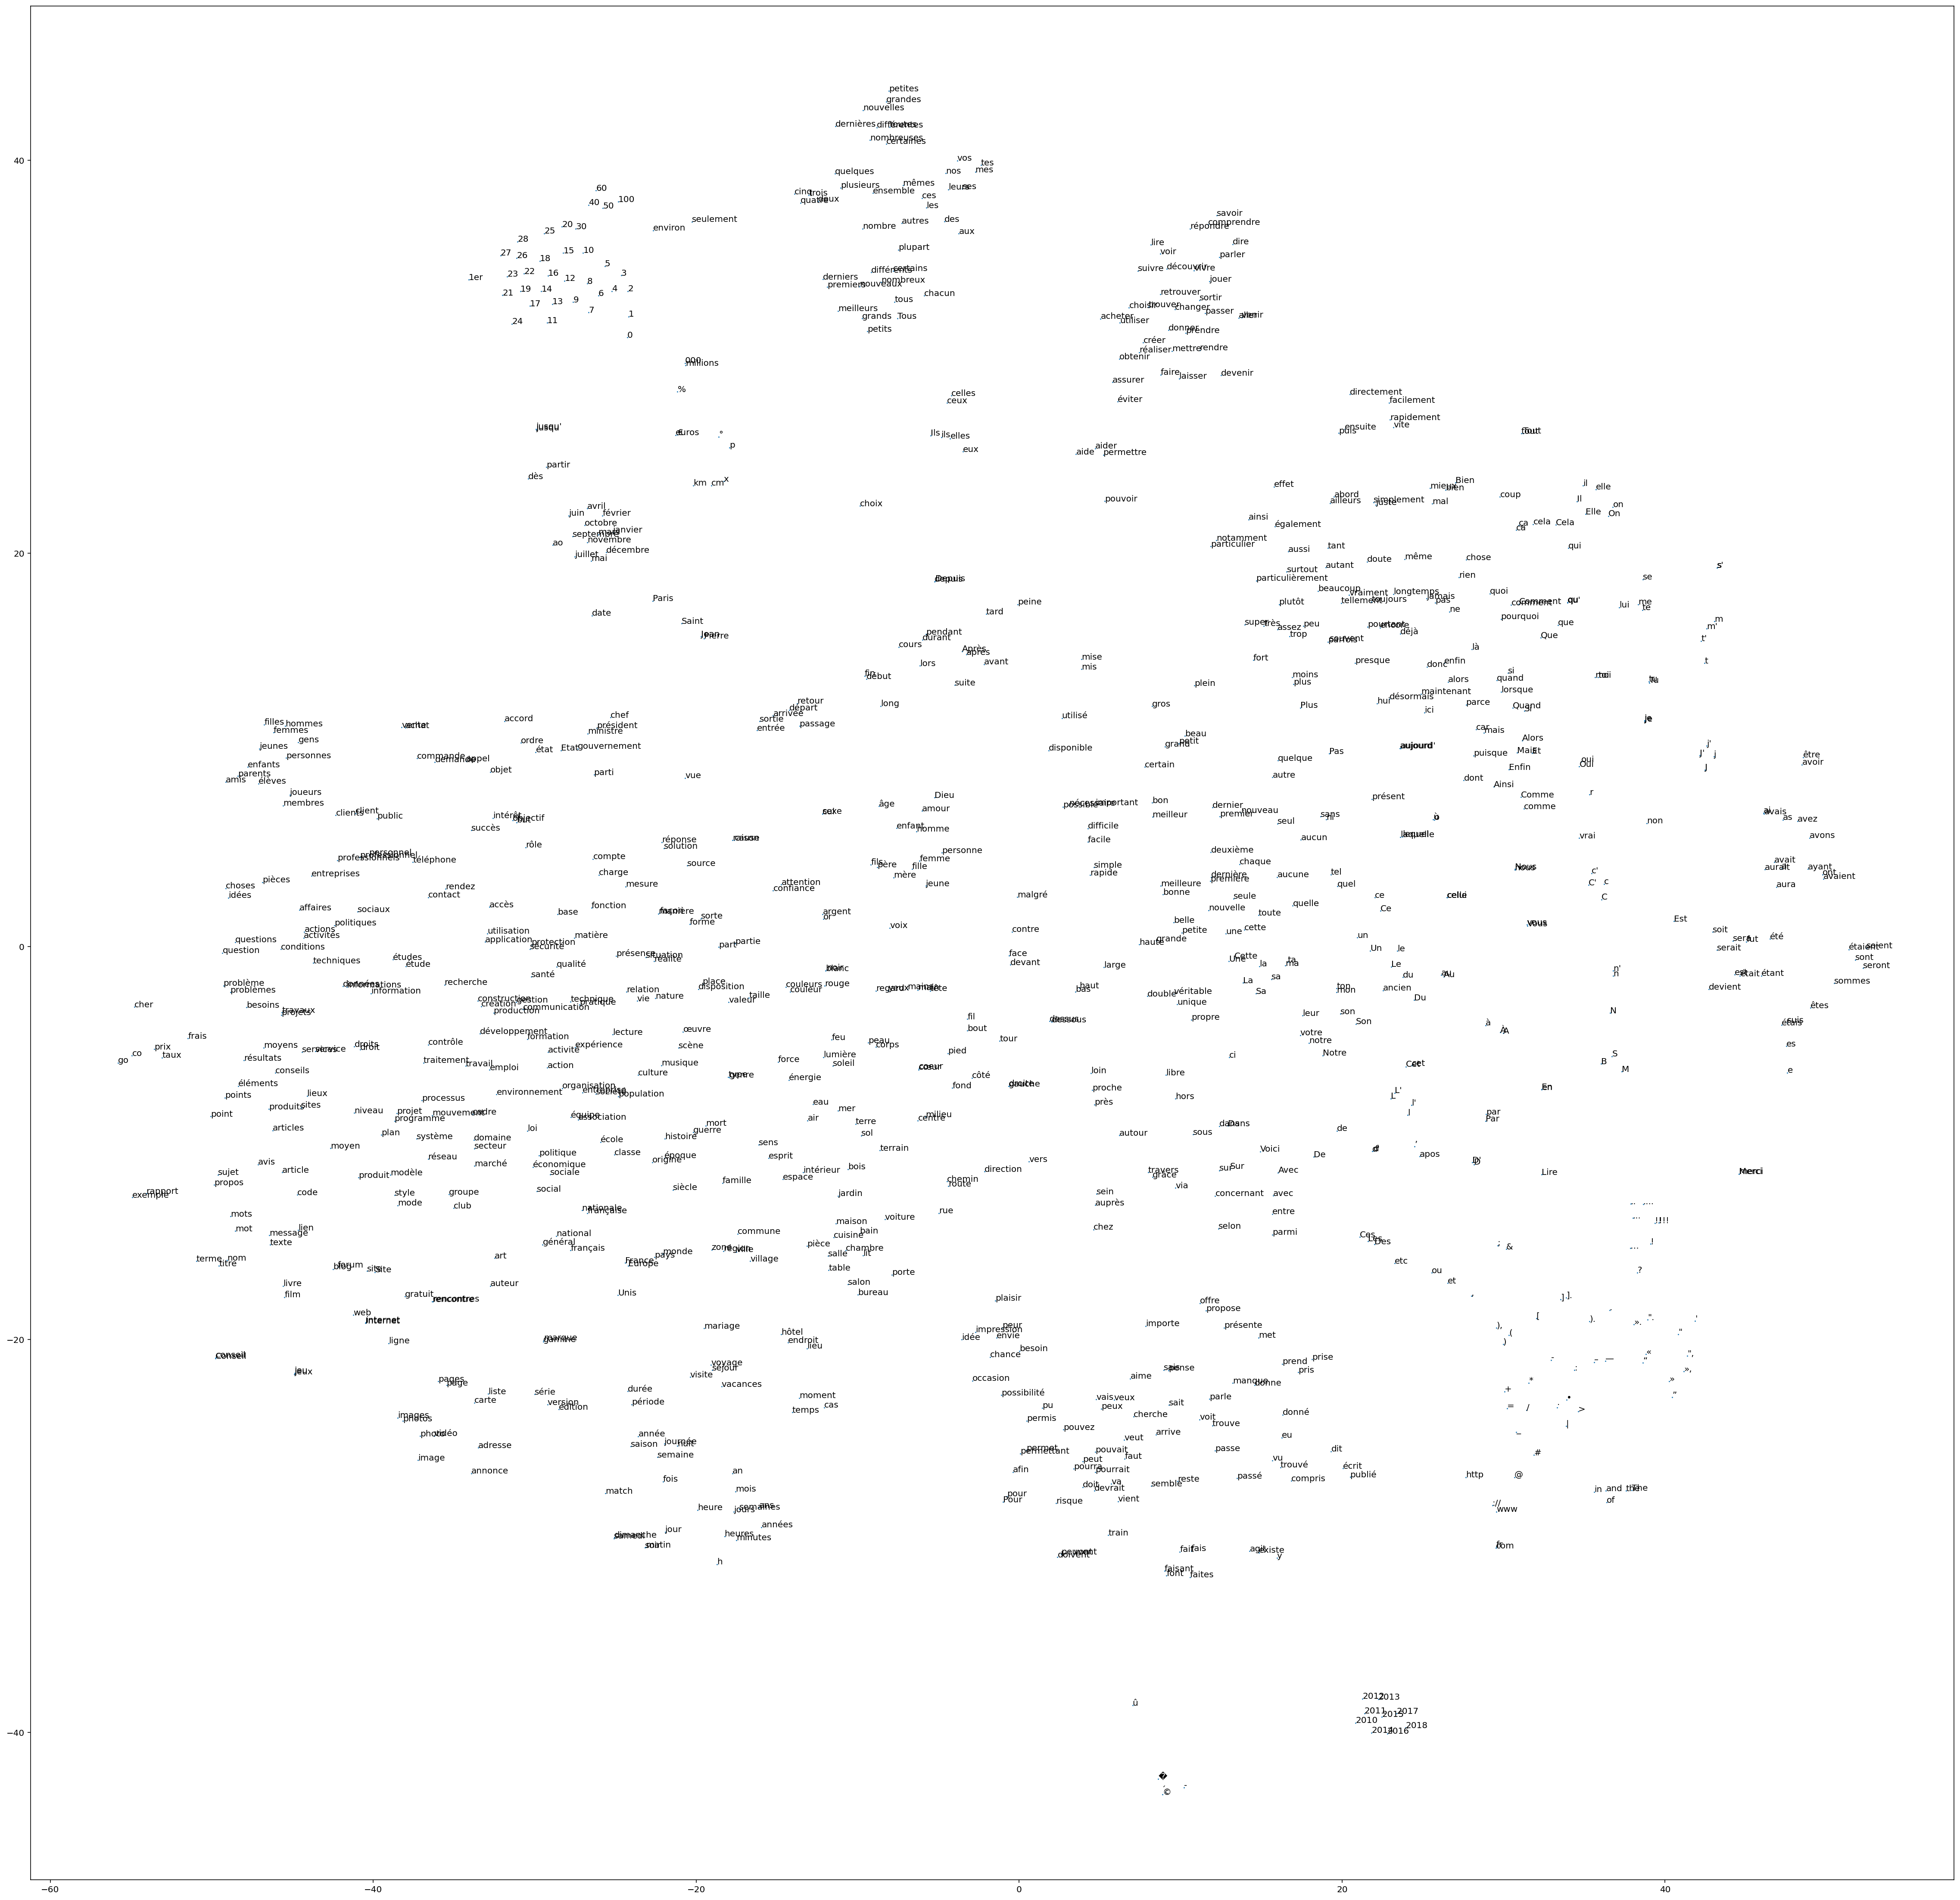

In [37]:
word_emb_tsne = TSNE(perplexity=30).fit_transform(word2vec_embeddings[:1000])

plt.figure(figsize=(40, 40))
axis = plt.gca()
np.set_printoptions(suppress=True)
plt.scatter(word_emb_tsne[:, 0], word_emb_tsne[:, 1], marker=".", s=1)

for idx in range(1000):
    plt.annotate(idx2w[idx],
                 xy=(word_emb_tsne[idx, 0], word_emb_tsne[idx, 1]),
                 xytext=(0, 0), textcoords='offset points')
plt.savefig("tsne.png")
plt.show()

<div class="alert alert-info" role="alert">
    <p><b>Exercice :</b> Visualisez la projection des pays et leur capitales</p>
</div>    

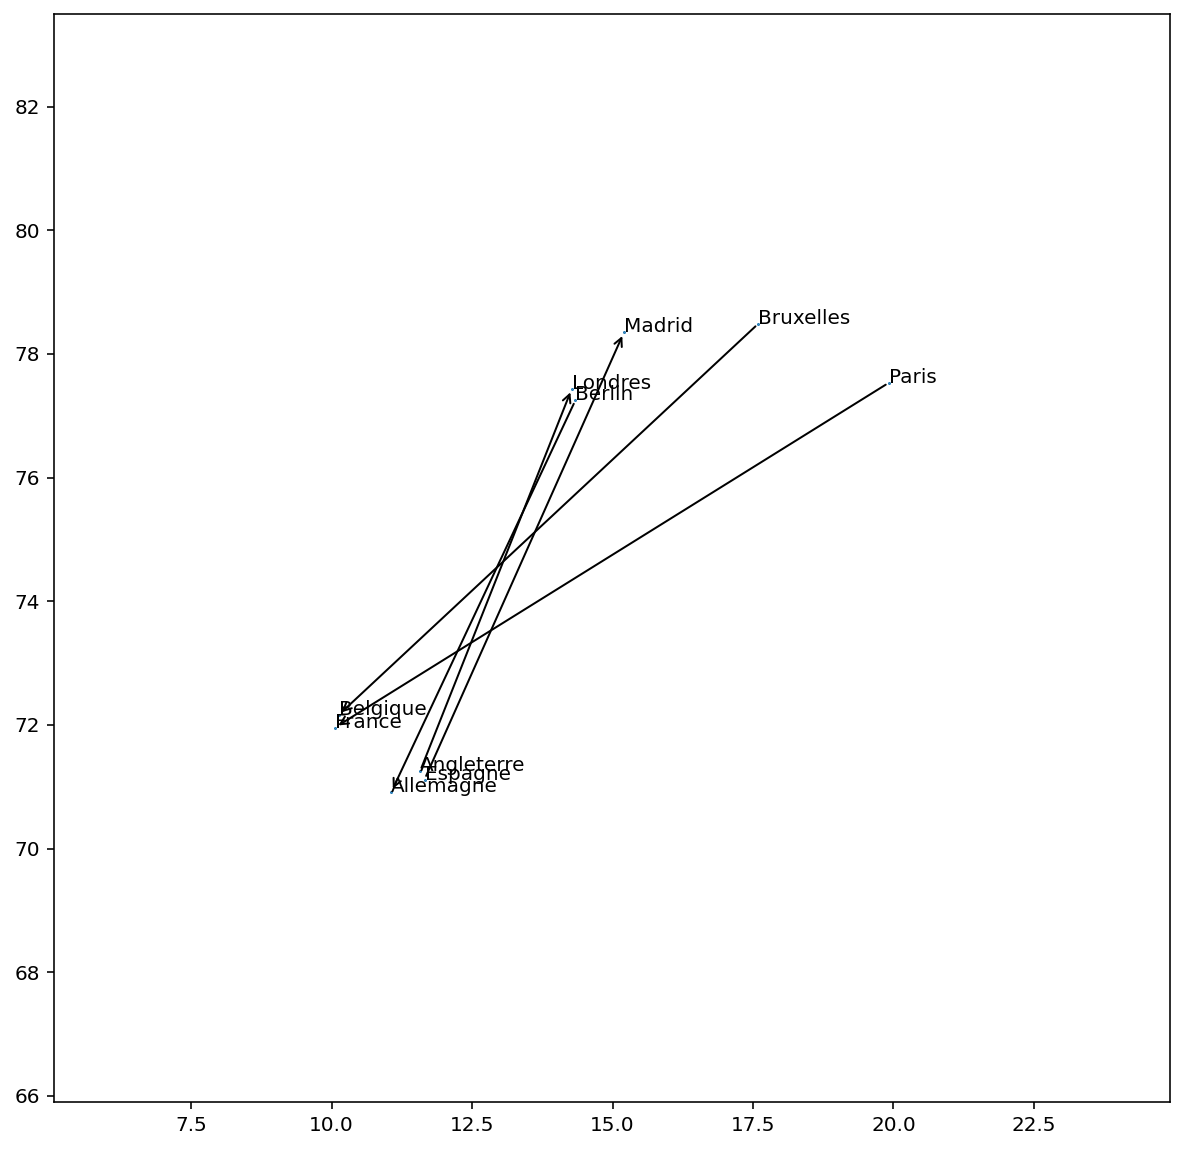

In [85]:
# %load solutions/capitales.py

pays = ['Allemagne', 'France', 'Belgique', 'Madrid', 'Londres']
capitales = ['Berlin', 'Paris', 'Bruxelles', 'Espagne', 'Angleterre']


<div class="alert alert-info" role="alert">
    <p><b>Exercice :</b> Visualisez la projection de verbes à l'infinitif ou conjugués</p>
</div>    

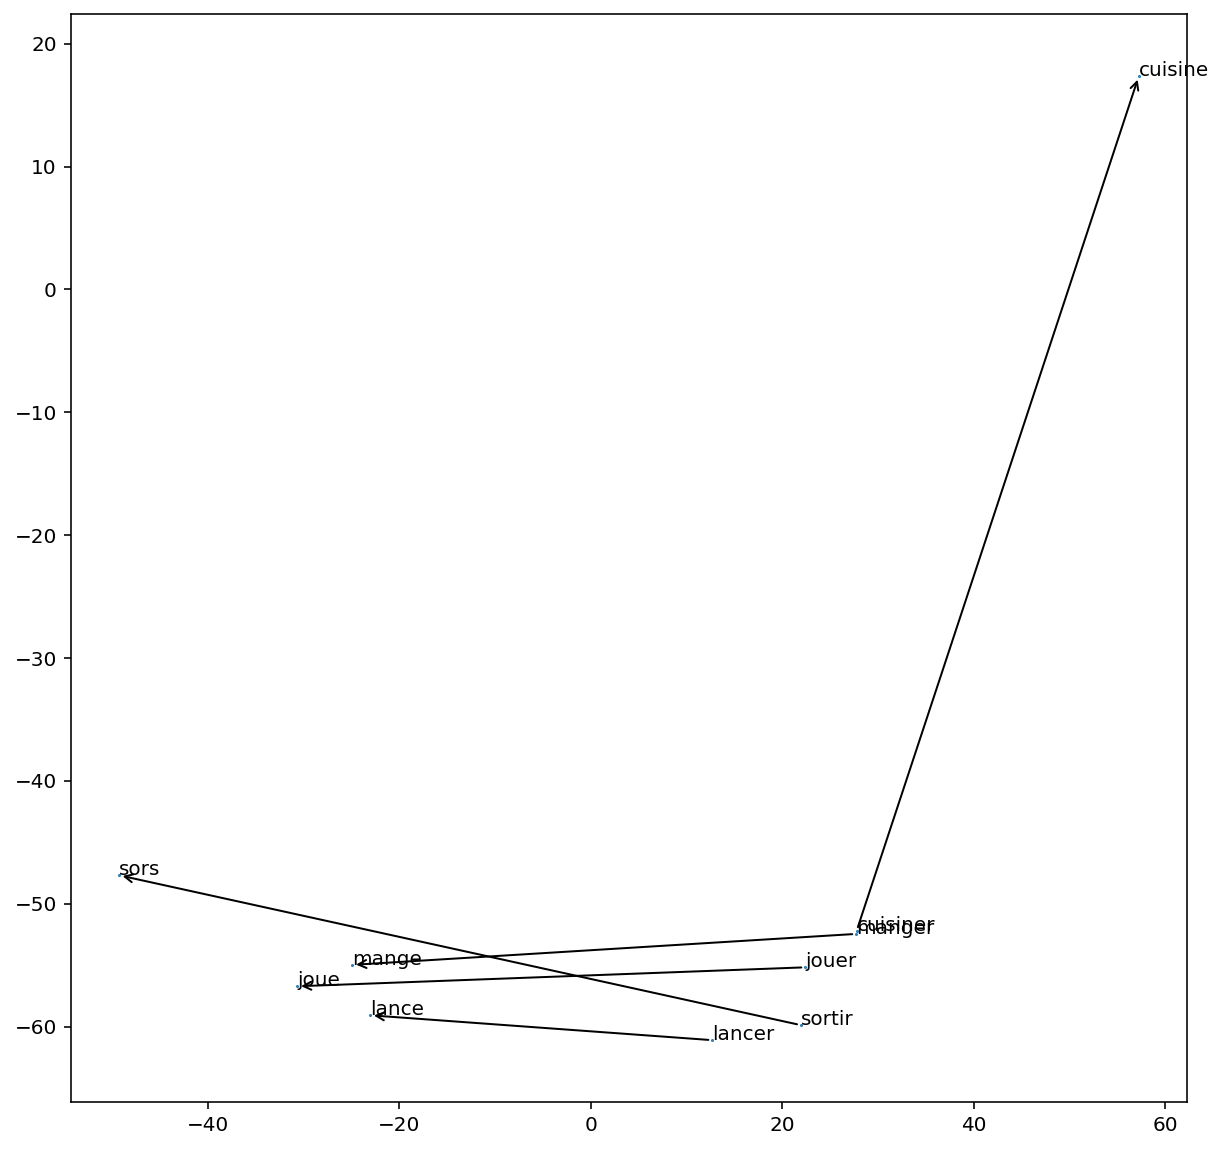

In [110]:
infinitif = ['manger', 'lancer', 'jouer', 'cuisiner', 'sortir']
conjugaison = ['mange', 'lance', 'joue', 'cuisine', 'sors']

<div class="alert alert-info" role="alert">
    <p><b>Exercice :</b> Comment interprétez vous la représentation du mot cuisine ?</p>
</div>    

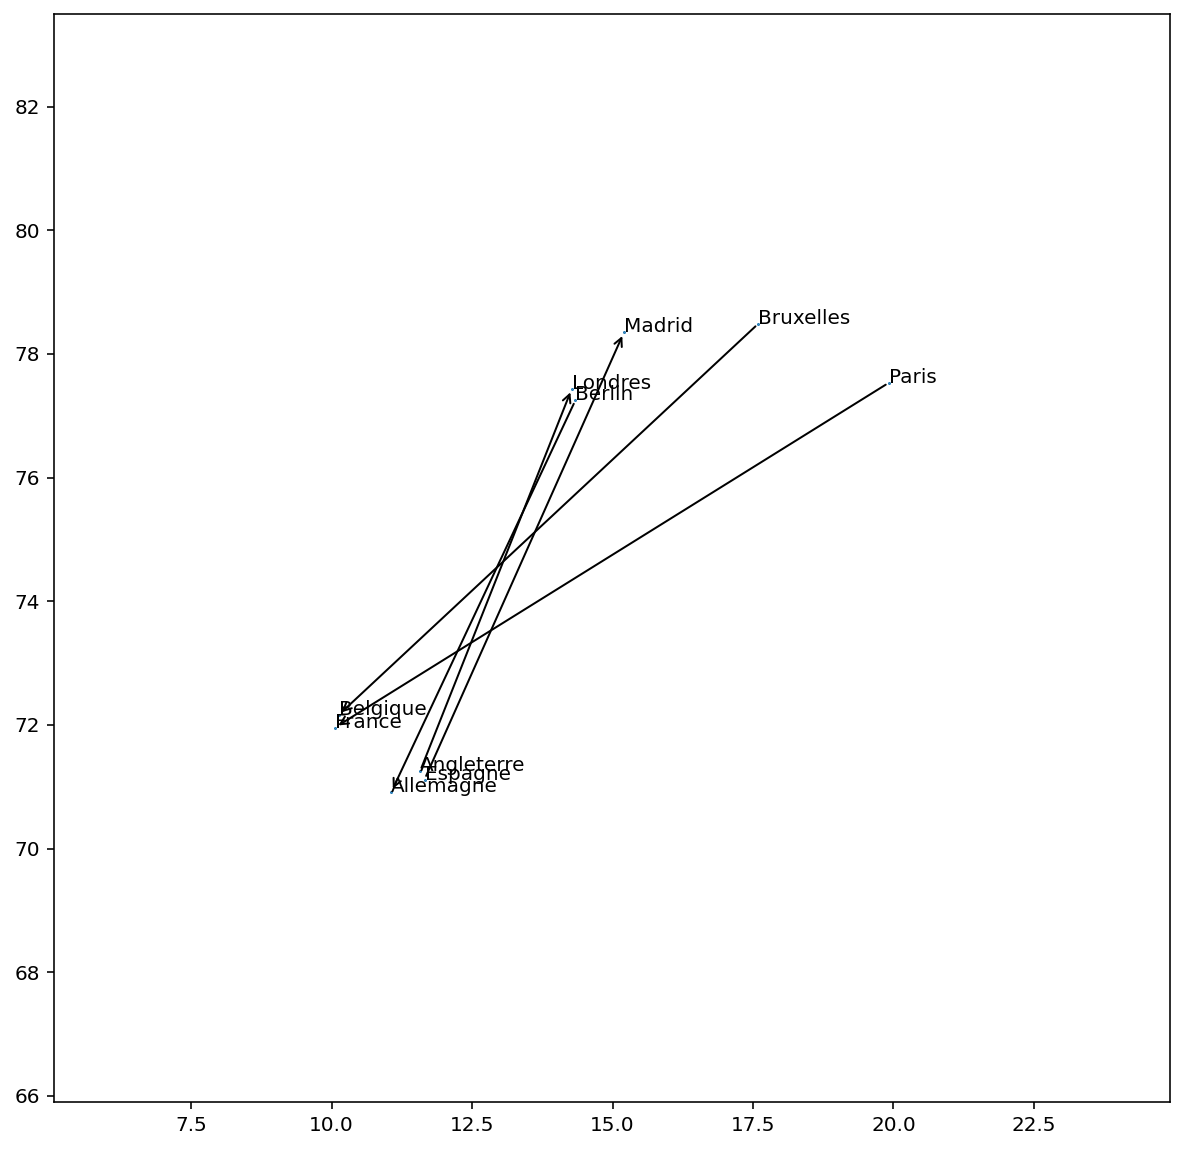

In [193]:
# word_emb_tsne = TSNE(perplexity=30).fit_transform(word2vec_embeddings[:10000])

plt.figure(figsize=(10, 10))
axis = plt.gca()
np.set_printoptions(suppress=True)

pays = ['Allemagne', 'France', 'Belgique', 'Madrid', 'Londres']
capitales = ['Berlin', 'Paris', 'Bruxelles', 'Espagne', 'Angleterre']

x = [word_emb_tsne[w2idx[w], 0] for w in pays] + [word_emb_tsne[w2idx[w], 0] for w in capitales]
y = [word_emb_tsne[w2idx[w], 1] for w in pays] + [word_emb_tsne[w2idx[w], 1] for w in capitales]

plt.scatter(x, y, marker=".", s=1)

for p in pays:
    plt.annotate(p,
                 xy=(word_emb_tsne[w2idx[p], 0], word_emb_tsne[w2idx[p], 1]),
                 xytext=(0, 0), textcoords='offset points')

for c in capitales:
    plt.annotate(c,
                 xy=(word_emb_tsne[w2idx[c], 0], word_emb_tsne[w2idx[c], 1]),
                 xytext=(0, 0), textcoords='offset points')

for c, p in zip(pays, capitales):
    plt.annotate("",
                 xy=(word_emb_tsne[w2idx[c], 0], word_emb_tsne[w2idx[c], 1]),
                 xytext=(word_emb_tsne[w2idx[p], 0], word_emb_tsne[w2idx[p], 1]),
                 arrowprops=dict(arrowstyle="->"))

plt.xlim(min(x) - 5, max(x) + 5)
plt.ylim(min(y) - 5, max(y) + 5)
plt.savefig("tsne-pays-capitales.png")
plt.show()